In [ ]:
### 그래프가 왜 중요할까?
---
- 우리 주변에는 많은 복잡게(complex System)이 존재한다

- 이런 복잡계가 가진 공통적인 특성은 무엇인가?

`구성요소간의 복잡한 상호작용`

```
그래프는 복잡계를 효과적으로 표현하고 분석하기 위한 언어이다 .

복잡계는 구성 요소들 간의 상호작용으로 이루어진다
상호작용을 표현하기 위한 수단으로 그래프가 널리 사용된다
복잡계를 이해하고, 복잡계에 대한 정확한 예측을 하기 위해서는 복잡계 이면에 있는 그래프에 대한 이해가 필요 
```
---

### 그래프 관련 인공지능 문제란?
---

- 정점 분류(Node classification) 문제 
- 트위터에서의 공유 관계를 분석하여, 각 사용자의 정치적 성향을 알 수 있을까?
- 단백질의 상호작용을 분석하여 단백질의 역할을 알아낼 수 있을까?
- 연결 예측(Link prediction)문제란
- 페이스북 소셜네트워크는 어떻게 진화할까?
- 추천(Recommendation)문제 : 각자에게 필요한 물건은 무엇일까? 어떤 물건을 구매해야 만족도가 높을까?
- 군집 분석(Community Detection) 문제 : 연결 관계로부터 사회적 무리(social Circle)을 찾아낼 수 있을까?
- 랭킹(Ranking)및 정보검색(Information Retrieval) 문제: 웹이라는 거대한 그래프로부터 어떻게 중요한 웹페이지를 찾을까
- 정보전파(Information Cascading)  및 바이럴 마케팅(Viral Marketing)문제 : 정보는 네트워크를 통해 어떻게 전달될까? 어떻게 정보 전달을 최대화 할 수 있나
- 앞선 질문과 관련된 인공지능 기술을 배운다 
- 최첨단 기술보다는 기초와 직관적인 방법론에 집중한다. 그래프 신경망(Grapgh nural network)
---

### 그래프의 유형 및 분류
---

- 방향이 없는 그래프(undirected Gragh) vs 방향이 있는 그래프 (Directed Gragh)

- 협업관계,페이스북 친구            : 인용 그래프, 트위터 팔로우 그래프 

- 가중치가 없는 그래프 vs 가중치가 있는 그래프 

- 웹그래프, 페이스북 친구 그래프        :  전화 그래프, 유사도 그래프 

- 동종 그래프(Unpartite Grapgh) vs 이종 그래프(Bipartite Grapgh): 

- 동종 그래프는 단일 종류의 정점을 가진다   : 이종그래프는 두 종류의 정점을 가진다 
---

### 그래프 관련 필수 기초 개념 
---

```
정점은 V 간선은 E 라고 표시한다. 정점  v의 이웃들의 집합을 보통 N(v) 혹은 Nv로 적는다.

방향성이 있는 그래프에서는 나가는 이웃과 들어오는 이웃을 구분합니다 

Nout(v) Nin(v)  로 적는다 


```

### 그래프의 표현 및 저장 하는 방법

- networkX 를 사용한다. 그래프를 생성, 변경, 시각화할 수 있다. 그래프의 구조와 변화를 분석할 수 있다. 





[1]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[(1, 2)]
[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10)]


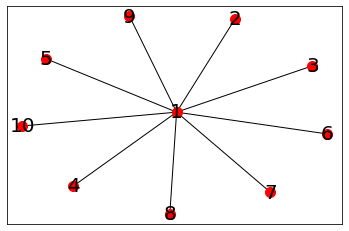

In [6]:
# 실습에 필요한 라이브러리 불러오기 
import networkx as nx 
import numpy as np 
import matplotlib.pyplot as plt 
G=nx.Graph()
DiGraph=nx.DiGraph()
# 정점을 추가하고, 정점의 수를 세고 , 목록을 반환합니다 
G.add_node(1)
print(G.nodes)
for i in range(1,11):
    G.add_node(i)
print(G.nodes)
G.add_edge(1,2)
print(G.edges)
for i in range(2,11):
    G.add_edge(1,i)
print(G.edges)
# 만들어진 그래프를 시각화합니다 
#그래프를 시각화
# 정점의 위치 결정
pos= nx.spring_layout(G)
#정점의 색과 크기를 지정하여 출력 
im=nx.draw_networkx_nodes(G,pos,node_color='red',node_size=100)
# 간선 출력
nx.draw_networkx_edges(G,pos)
# 각 정점의 라벨을 출력 
nx.draw_networkx_labels(G,pos,font_size=20,font_color='black')
plt.show()



In [ ]:
- 간선리스트(edge list): 그래프를 간선들의 리스트로 저장: 각 간선은 해당 간선이 연결하는 

- 방향성이 있는 경우에는 (출발점,도착점) 순서로 저장됩니다.

- 인접리스트(Adjacent list) - 방향성이 있는 경우 : 각 정점의 나가는 이웃들과 들어오는 이웃들을 각각 리스트로 저장 

- 인접행렬( Adjacency Matrix) - 방향성이 없는 경우 / 방향성이 없는 경우 

```
 일반 행렬은 전체 원소를 저장하므로 정점 수의 제곱에 비례하는 저장 공간을 사용 

 희소 행렬은 0 이 아닌 원소만을 저장하므로 간선의 수에 비례하는 저장 공간을 사용 
 
 예시) 정점의 수가 10만 간선의 수가 100만이라면 
 정점의 수의 제곱(100억) >> 간선의 수 (100만)
```

In [7]:
# 그래프를 인접리스트로 저장 
print(nx.to_dict_of_lists(G))
# 그래프를 간선 리스트로 저장
print(nx.to_edgelist(G))
# 그래프를 인접 행렬(일반행렬)로 저장
print(nx.to_numpy_array(G))
#그래프를 인접 행렬(희소행렬)로 저장 
print(nx.to_scipy_sparse_matrix(G))

{1: [2, 3, 4, 5, 6, 7, 8, 9, 10], 2: [1], 3: [1], 4: [1], 5: [1], 6: [1], 7: [1], 8: [1], 9: [1], 10: [1]}
[(1, 2, {}), (1, 3, {}), (1, 4, {}), (1, 5, {}), (1, 6, {}), (1, 7, {}), (1, 8, {}), (1, 9, {}), (1, 10, {})]
[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (1, 0)	1
  (2, 0)	1
  (3, 0)	1
  (4, 0)	1
  (5, 0)	1
  (6, 0)	1
  (7, 0)	1
  (8, 0)	1
  (9, 0)	1


In [ ]:
### 실제 그래프vs 랜덤 그래프
---

```
애르되스-레니 랜덤 그래프

임의의 두 정점 사이에 간선이존재하는지 여부는 동일한 확률 분포에 의해 결정됩니다.
에르되스-레니 랜덤그래프 G(n,p) 는 
- n개의 정점을 가진다.
- 임의의 두 개의 정점 사이에 간선이 존재할 확률은 p이다
- 정점 간의 연결은 서로 독릭적(Independent)하다.

정점 u와v의 사이의 경로는 아래 조건을 만족하는 정점들의 순열이다.
1) u에서 시작해서 v에서 끝나야 한다
2) 순열에서 연속된 정점은 간서으로 연결되어 있어야 한다.

경로의 길이는 해당 경로 상에 놓이는 간선의 수로 정의됩니다.

임이의 두 사람을 골랐을 때, 몇 단계의 지인을 거쳐 연결되어 있을까?

여섯 단계 분리(Six Degree of Seperation) 실험

`작은세상 효과`는 높은 확률로 랜덤 그래프에도 존재한다

체인 ,사이클,격자 그래프에서는 작은 세상 효과가 존재하지 않는다. 

연결성의 두터운 꼬리 분포 

정점의 연결성(Degree)은 그 정점과 연결된 간선의 수를의미합니다 

랜덤 그래프의 연결성 분포는 확률로 정규분포와 유사하다.

`거대연결 요소`

연결 요소(Connected Compoenet)는 다음 조건들을 만족하는 정점들의 집합을 의미한다.
1) 연결 요소에 속하는 정점들을 경로로 연결될 수 있습니다.
2) (1) 의 조건을 만족하면서 정점을 추가할 수 없다.

랜덤 그래프에도 높은 확률로 거대연결 요소 가 존재한다
단, 정점들의 평균 연결성이 1보다 충분히 커야 한다. 자세한 이유는  Random Gragh Theory 를 참고


`군집 구조` 

군집(community) 이란 다음 조건들을 만족하는 정점들의 집합입니다.

1) 집합에 속하는 정점 사이에는 많은 간선이 존재한다.
2) 집합에 속하는 정점과 그렇지 않은 정점 사이에는 적은 수의 간선이 존재한다.

수학적으로 엄밀한 정의는 아니다. 

지역적 군집계수(Local Clutering Coefficient)는 한 정점에서 군집의 형성 정도를 측정한다.

정점i의 지역적 군집 계수는 정점 I의 이웃 쌍 중 간선으로 직접 연결된 것의 비율을 의미한다.
정점 i의 지역적 군집계수를 Ci로 표현한다

`지역적 군집 계수가` 가 `군집`이랑 어떻게 연결되는가?
정점 i의 지역적 군집계수가 매우 높다고 하자. 즉 정점 i의 이웃들도 높은 확률로 서로 간선으로 직접 연결되어 있다. 정점 i와 그 이웃들은 높은 확률로 `군집`을 형성한다. 

`전역 군집 계수( Global Clutering Coefficient)는 전체 그래프에서 ` 군집의 형성 정도를 측정한다
그래프 G의 전역 군집 계수는 각 정점에서의 군집 계수의 `평균`이다. 단 , 지역적 군집 계수가 정의되지 않는 정점은 제외한다.


동질성

전이성(Transitivity) : 공통 이웃이 있는 경우, 공통 이웃이 매개 역할을 해줄수 있다. 

반면 랜덤 그래프에서는 `지역적 혹은 전역 군집 계수`가 높지 않다. 
구체적으로 랜덤 그래프 G(n,p)에서의 군집 계수는 p이다. 랜덤 그래프에서의 간선 연결이 독립적인 것을 고려하면 당연한 결과이다. 
즉, 공통 이웃의 존재 여부가 간선 연결 확률에 영향을 미치지 않는다.  

```



In [ ]:
### 실습 군집 계수 및 지름 분석 
---
- 세 종류의 그래프의 구조를 분석하기 

- 균일 그래프, 작은 세상 그래프, 랜덤 그래프 

---

### Graph 정리 

- 실제그래프 vs 랜덤그래프: 실제그래프는 복잡계로부터 얻어지는 반면, 랜덤 그래프는 확률적 과정을 통해 생성됩니다.
- 작은 세상 효과: 실제 그래프의 정점들은 가깝게 연결되어 있다.
- 연결성의 두터운 꼬리 분포: 실제 그래프에는 연결성이 매우 높은 허브 정점이 존재한다.
- 거대연결요소: 실제 그래프에는 대부분의 정점을 포함하는 거대 연결 요소가 존재한다.
- 군집 구조: 실제 그래프에는 군집이 존재하며, 실제 그래프는 군집 계수가 높다.

---